In [27]:
import sys; sys.path.append('..')
import pyzx as zx
import random
%config InlineBackend.figure_format = 'svg'

In [64]:
random.seed(100)
g = zx.generate.cliffordT(4, 50, p_t=0.2)
zx.t_count(g)

11

spider_simp: 16. 10. 5. 4. 2. 1.  6 iterations
pivot_simp: 3. 1.  2 iterations
lcomp_simp: 7. 3. 2. 1. 1. 1. 1. 1.  8 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
pivot_simp: 1. 1.  2 iterations
5


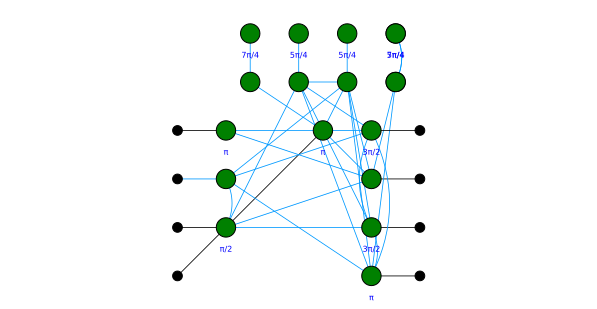

In [66]:
g1 = g.copy()
zx.spider_simp(g1)
zx.to_gh(g1)
zx.simplify.clifford_simp(g1)
g1.normalise()
gadgets = set(zx.gadgetize(g1))
zx.simplify.pivot_simp(g1, matchf=lambda e: not (g1.edge_s(e) in gadgets or g1.edge_t(e) in gadgets))
#zx.simplify.clifford_simp(g1)
print(zx.t_count(g1))
zx.draw(g1, labels=False, figsize=(8,4))

In [63]:
zx.quantomatic.quantomatic_location = 'C:\\quanto\\Quantomatic.jar'

In [69]:
g2 = zx.quantomatic.edit_graph(g2)

Opening Quantomatic...
Done


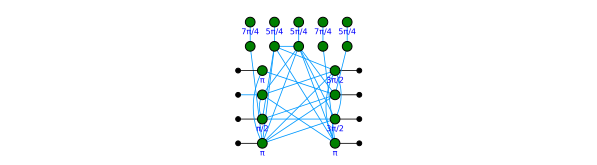

In [70]:
zx.draw(g2)